In [1]:
import os 
from DeepST_main.DeepST_main.deepst.DeepST import run
import matplotlib.pyplot as plt
from pathlib import Path
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
from my6_Triplet.utils import fix_seed

fix_seed(1)

In [3]:
data_path = "../../../data/DLPFC" 
data_name_list = ['151669', '151670', '151671', '151672']
save_path = "../Results" 
n_domains = 5

deepen = run(save_path = save_path, 
	task = "Integration",
	pre_epochs = 800, 
	epochs = 1000, 
	use_gpu = True,
	)

###### Generate an augmented list of multiple datasets
augement_data_list = []
graph_list = []
for i in range(len(data_name_list)):
	adata = deepen._get_adata(platform="Visium", data_path=data_path, data_name=data_name_list[i])
	adata = deepen._get_image_crop(adata, data_name=data_name_list[i])
	adata = deepen._get_augment(adata, spatial_type="LinearRegress")
	graph_dict = deepen._get_graph(adata.obsm["spatial"], distType = "KDTree")
	augement_data_list.append(adata)
	graph_list.append(graph_dict)

######## Synthetic Datasets and Graphs
multiple_adata, multiple_graph = deepen._get_multiple_adata(adata_list = augement_data_list, data_name_list = data_name_list, graph_list = graph_list)

###### Enhanced data preprocessing
data = deepen._data_process(multiple_adata, pca_n_comps = 200)

deepst_embed = deepen._fit(
		data = data,
		graph_dict = multiple_graph,
		domains = multiple_adata.obs["batch"].values,  ##### Input to Domain Adversarial Model
		n_domains = len(data_name_list))
multiple_adata.obsm["DeepST_embed"] = deepst_embed
multiple_adata = deepen._get_cluster_data(multiple_adata, n_domains=n_domains, priori = True)

# sc.pp.neighbors(multiple_adata, use_rep='DeepST_embed')
# sc.tl.umap(multiple_adata)
# sc.pl.umap(multiple_adata, color=["DeepST_refine_domain","batch_name"])
# plt.savefig(os.path.join(save_path, f'{"_".join(data_name_list)}_umap.pdf'), bbox_inches='tight', dpi=300)

# for data_name in data_name_list:
# 	adata = multiple_adata[multiple_adata.obs["batch_name"]==data_name]
# 	sc.pl.spatial(adata, color='DeepST_refine_domain', frameon = False, spot_size=150)
# 	plt.savefig(os.path.join(save_path, f'{data_name}_domains.pdf'), bbox_inches='tight', dpi=300)

D:\anaconda\envs\njy\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\njy\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
D:\anaconda\envs\njy\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anaconda\envs\njy\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 33.158426659382684
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


D:\anaconda\envs\njy\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\njy\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
D:\anaconda\envs\njy\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anaconda\envs\njy\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 32.59862778730703
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


D:\anaconda\envs\njy\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\njy\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
D:\anaconda\envs\njy\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anaconda\envs\njy\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 33.53722627737226
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


D:\anaconda\envs\njy\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\njy\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
D:\anaconda\envs\njy\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anaconda\envs\njy\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 32.58505603985056
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


D:\njy\研二\论文项目文件\project1\DeepST_main\DeepST_main\deepst\DeepST.py:190: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)
D:\njy\研二\论文项目文件\project1\DeepST_main\DeepST_main\deepst\DeepST.py:190: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)
D:\njy\研二\论文项目文件\project1\DeepST_main\DeepST_main\deepst\DeepST.py:190: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/

Your task is in full swing, please wait


DeepST trains an initial model: 100%|██████████ [ time left: 00:00 ]
DeepST trains a final model:   0%|           [ time left: ? ]D:\anaconda\envs\njy\Lib\site-packages\torch\nn\functional.py:2949: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(
DeepST trains a final model: |           [ time left: 00:00 ]    


Step 3: DeepST training has been Done!
Current memory usage：23.0281 GB
Total time: 3.29 minutes
Your task has been completed, thank you
Of course, you can also perform downstream analysis on the processed data


D:\njy\研二\论文项目文件\project1\DeepST_main\DeepST_main\deepst\DeepST.py:165: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state=0, resolution=res)


Best resolution:  0.21999999999999995


In [4]:
from sklearn.metrics import adjusted_rand_score as ari_score
from sklearn.metrics import normalized_mutual_info_score as nmi_score
from sklearn.metrics import adjusted_mutual_info_score as ami_score
from sklearn.metrics import homogeneity_score as hom_score
from sklearn.metrics import completeness_score as com_score

In [5]:
multiple_adata

AnnData object with n_obs × n_vars = 15284 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'layer_guess', 'slices_path', 'batch_name', 'batch', 'leiden', 'DeepST_domain', 'DeepST_refine_domain'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'neighbors', 'leiden', 'DeepST_domain'
    obsm: 'spatial', 'image_feat', 'image_feat_pca', 'weights_matrix_all', 'adjacent_data', 'augment_gene_data', 'DeepST_embed'
    obsp: 'distances', 'connectivities'

In [6]:
indices = np.logical_not(multiple_adata.obs["layer_guess"].isna())
ground_truth = multiple_adata.obs["layer_guess"].dropna()
ARI = ari_score(ground_truth[indices], multiple_adata.obs['DeepST_refine_domain'][indices])
print(f"total ARI:{ARI}")
for name in data_name_list:
    sub_adata_tmp = multiple_adata[multiple_adata.obs['batch_name'] == name]
    ARI = ari_score(sub_adata_tmp.obs['layer_guess'][indices], sub_adata_tmp.obs['DeepST_refine_domain'][indices])
    print(f"{name} ARI:{ARI}")

total ARI:0.40603290872892245
151669 ARI:0.3965422088378019
151670 ARI:0.4195904074735881
151671 ARI:0.4828339824000321
151672 ARI:0.3885469259669363


In [7]:
NMI = nmi_score(ground_truth[indices], multiple_adata.obs['DeepST_refine_domain'][indices])
AMI = ami_score(ground_truth[indices], multiple_adata.obs['DeepST_refine_domain'][indices])
print(f"total NMI:{NMI}")
print(f"total NMI:{AMI}")
for name in data_name_list:
    sub_adata_tmp = multiple_adata[multiple_adata.obs['batch_name'] == name]
    NMI = nmi_score(sub_adata_tmp.obs['layer_guess'][indices], sub_adata_tmp.obs['DeepST_refine_domain'][indices])
    AMI = ami_score(sub_adata_tmp.obs['layer_guess'][indices], sub_adata_tmp.obs['DeepST_refine_domain'][indices])
    ACC = 1/2 * (NMI + AMI)
    print(f"ACC:{ACC}")

total NMI:0.5372499893695508
total NMI:0.5370679458507023
ACC:0.5525520908366919
ACC:0.5475148468211912
ACC:0.614950358155792
ACC:0.5525651473116087


In [8]:
HOM = hom_score(ground_truth[indices], multiple_adata.obs['DeepST_refine_domain'][indices])
COM = com_score(ground_truth[indices], multiple_adata.obs['DeepST_refine_domain'][indices])
print(f"total HOM:{HOM}")
print(f"total COM:{COM}")
for name in data_name_list:
    sub_adata_tmp = multiple_adata[multiple_adata.obs['batch_name'] == name]
    HOM = hom_score(sub_adata_tmp.obs['layer_guess'][indices], sub_adata_tmp.obs['DeepST_refine_domain'][indices])
    COM = com_score(sub_adata_tmp.obs['layer_guess'][indices], sub_adata_tmp.obs['DeepST_refine_domain'][indices])
    V =  2 * ((HOM * COM) / (HOM + COM))
    print(f"V:{V}")

total HOM:0.5256484113261819
total COM:0.5493752419280873
V:0.5529324134401481
V:0.5478477735939167
V:0.6151606268415103
V:0.5528186065532887


3.056510750545023
1.1174885126361551


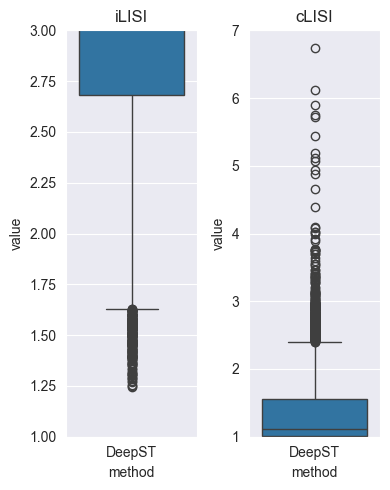

In [9]:
import seaborn as sns
import harmonypy as hm

iLISI = hm.compute_lisi(multiple_adata.obsm['DeepST_embed'], multiple_adata.obs[['batch_name']], label_colnames=['batch_name'])[:, 0]
cLISI = hm.compute_lisi(multiple_adata.obsm['DeepST_embed'], multiple_adata.obs[['layer_guess']], label_colnames=['layer_guess'])[:, 0]
df_iLISI = pd.DataFrame({
    'method': 'DeepST',
    'value': iLISI,
    'type': ['ILISI'] * len(iLISI)
})

df_cLISI = pd.DataFrame({
    'method': 'DeepST',
    'value': cLISI,
    'type': ['CLISI'] * len(cLISI)
})

fig, axes = plt.subplots(1, 2, figsize=(4, 5))
sns.boxplot(data=df_iLISI, x='method', y='value', ax=axes[0])
sns.boxplot(data=df_cLISI, x='method', y='value', ax=axes[1])
axes[0].set_ylim(1, 3)
axes[1].set_ylim(1, 7)
axes[0].set_title('iLISI')
axes[1].set_title('cLISI')

plt.tight_layout()
print(np.median(iLISI))
print(np.median(cLISI))

In [10]:
multiple_adata.write('DeepST_DLPFC_Donor2.h5ad')